## Animations of regions of convection (with associated humidity and precipitation extremes distribution)

for investigating \
correlation between daily ROME and daily high percentile precipitaiton extremes \
correlation between daily ROME and drying in the subtropics

In [42]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

import timeit

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [43]:
models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
model = models[0]



experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]


In [44]:
folder = home + '/Documents/data/cmip5/ds2/' + model
fileName = model + '_precip_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
precip = ds.precip*60*60*24
precip.attrs['units']= 'mm/day'
precip

<xarray.DataArray 'precip' (time: 10950, lat: 22, lon: 128)>
array([[[4.08858657e-01, 3.12826395e-01, 2.66478002e-01, ...,
         7.82788754e-01, 5.55889487e-01, 4.91493523e-01],
        [4.22117233e-01, 2.40650624e-01, 1.58740297e-01, ...,
         8.07168961e-01, 5.85888326e-01, 5.24520874e-01],
        [2.71370828e-01, 1.18661821e-01, 6.75984770e-02, ...,
         4.74144459e-01, 4.24919963e-01, 4.05480087e-01],
        ...,
        [1.90939274e-04, 2.30353166e-04, 4.63937467e-05, ...,
         0.00000000e+00, 2.78055512e-09, 2.02344672e-05],
        [1.62480981e-04, 5.49919961e-04, 2.26543372e-04, ...,
         4.59178806e-11, 3.44704154e-10, 2.20209113e-05],
        [1.87449245e-04, 8.20199493e-05, 4.61850832e-05, ...,
         4.66769282e-03, 5.29152434e-03, 3.79748479e-03]],

       [[5.20864546e-01, 5.28695166e-01, 4.83805656e-01, ...,
         5.20202994e-01, 4.44190621e-01, 4.29574966e-01],
        [4.38689321e-01, 4.05646205e-01, 2.81971216e-01, ...,
         4.92263496e-01, 3.51503998e-01, 3.77124488e-01],
        [5.00151277e-01, 4.25230354e-01, 1.98965132e-01, ...,
         4.04337049e-01, 3.45240235e-01, 4.43055809e-01],
...
        [5.59766899e-09, 2.99688229e-32, 0.00000000e+00, ...,
         2.86355467e-10, 7.04136927e-09, 1.71255028e-08],
        [4.88535523e-09, 1.17072363e-09, 8.21280643e-09, ...,
         5.12836152e-07, 5.82156972e-08, 3.00863725e-08],
        [1.89105576e-05, 2.66464149e-08, 4.29197513e-08, ...,
         2.21278742e-02, 2.44675390e-02, 2.96266121e-03]],

       [[2.66608298e-01, 2.07568243e-01, 2.14525402e-01, ...,
         1.79786175e-01, 2.77063102e-01, 3.14550877e-01],
        [3.14109057e-01, 3.18816870e-01, 2.46779546e-01, ...,
         3.24843109e-01, 3.32155108e-01, 2.67388195e-01],
        [4.73636806e-01, 4.05086994e-01, 3.10137302e-01, ...,
         2.16585651e-01, 3.06336045e-01, 4.47086453e-01],
        ...,
        [1.05024958e-02, 5.50237438e-03, 3.46267416e-06, ...,
         1.23978796e-04, 9.12268995e-04, 3.50002619e-03],
        [8.40858263e-07, 4.97356996e-06, 1.98428370e-06, ...,
         3.36105913e-05, 9.05447791e-07, 2.45206934e-07],
        [6.08904869e-04, 9.31636605e-05, 4.13278076e-06, ...,
         7.81251043e-02, 1.14151299e-01, 3.18472683e-02]]], dtype=float32)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    units:    mm/day

In [45]:
aWeights = np.cos(np.deg2rad(precip.lat))

In [46]:
folder = home + '/Documents/data/cmip5/' + model
fileName = model + '_prPercentiles_' + experiment + '.nc'
path = folder + '/' + fileName
pr_percentiles = xr.open_dataset(path)
pr_percentiles

<xarray.Dataset>
Dimensions:  (time: 10950)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Data variables:
    pr95     (time) float64 ...
    pr97     (time) float64 ...
    pr99     (time) float64 ...
    pr999    (time) float64 ...

In [47]:
conv_threshold = pr_percentiles.pr97.mean(dim=('time'))

In [48]:
percentile_options = [
    # 'pr95',
    # 'pr97',
    'pr99',
    # 'pr999',
    ]
percentile_option = percentile_options[0]

In [49]:
folder = home + '/Documents/data/cmip5/' + model
fileName = model + '_rome_' + experiment + '.nc'
path = folder + '/' + fileName
rome = xr.open_dataset(path)
rome

<xarray.Dataset>
Dimensions:  (time: 10950)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Data variables:
    rome     (time) float64 ...
    rome_n   (time) float64 ...
Attributes:
    description:  ROME based on all and the 8 largest contiguous convective r...
    units:        km^2

In [50]:
rome_options = [
    'rome',
    # 'rome_n'
    ]
rome_option = rome_options[0]

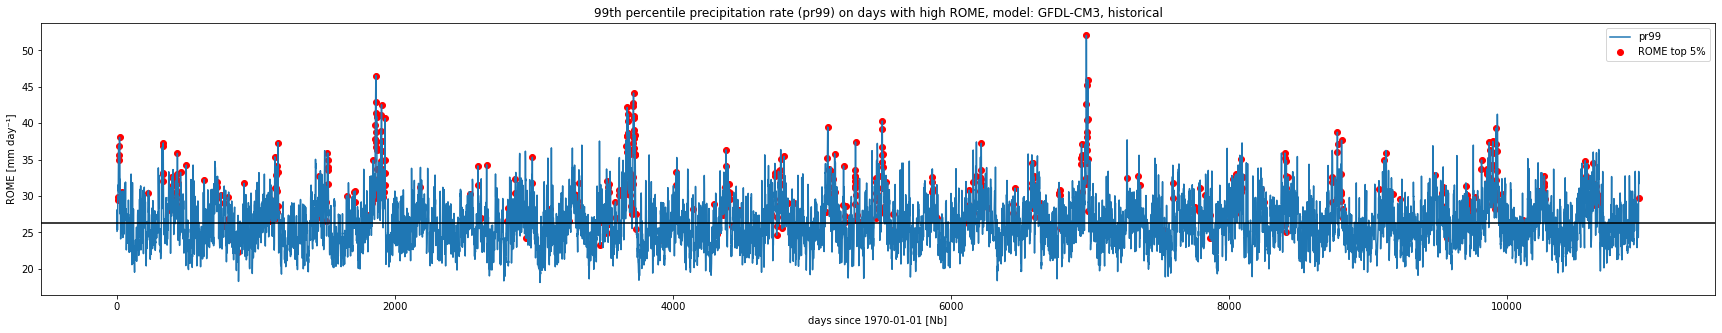

In [51]:
f, ax = plt.subplots(figsize = (30,5))

y = pr_percentiles[percentile_option].data
x= np.arange(0,len(y),1)
rome_prctile = np.percentile(rome[rome_option],95)
x2= np.argwhere(rome[rome_option].data>=rome_prctile)

ax.plot(x,y, label=percentile_option)
ax.scatter(x2,y[x2],label='ROME top 5%', color='r')
ax.axhline(y=np.mean(y), color='k')
ax.set_title('99th percentile precipitation rate (pr99) on days with high ROME, model: ' + model + ', ' + experiment)
ax.set_xlabel('days since 1970-01-01 [Nb]')
ax.set_ylabel('ROME [mm day' + chr(0x207B) + chr(0x00B9)+ ']')
ax.legend()

<Figure size 1440x540 with 0 Axes>

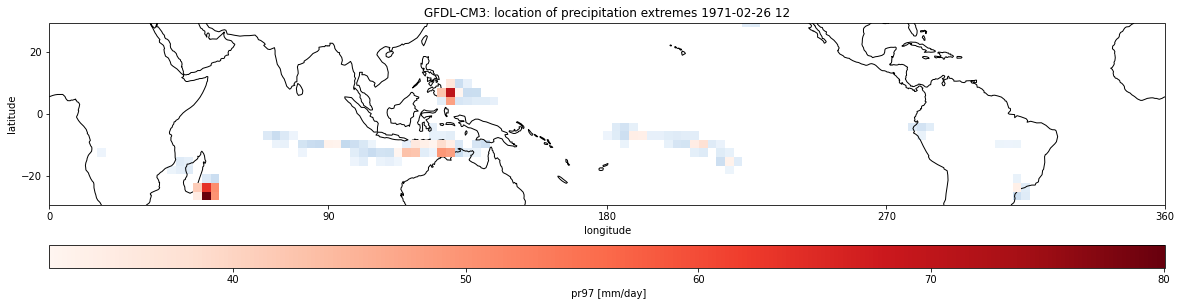

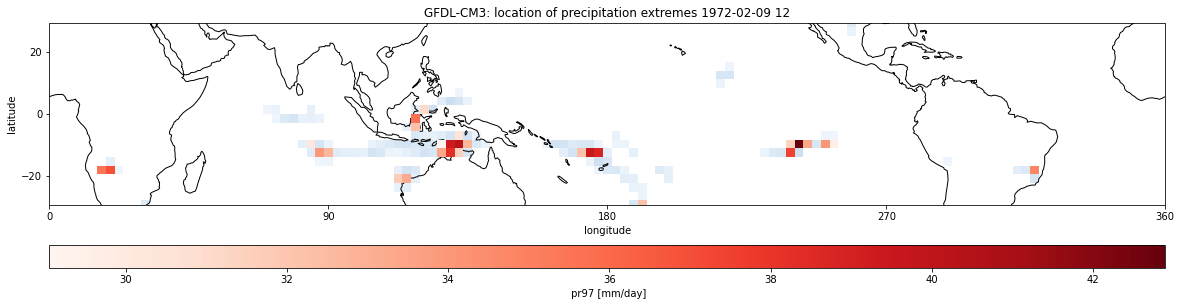

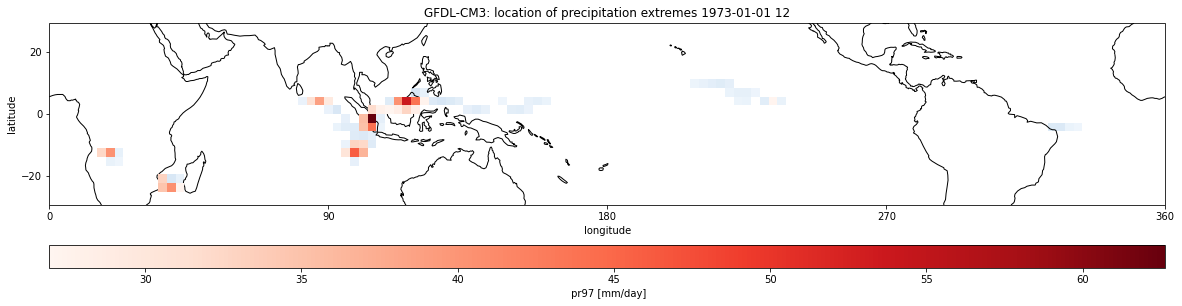

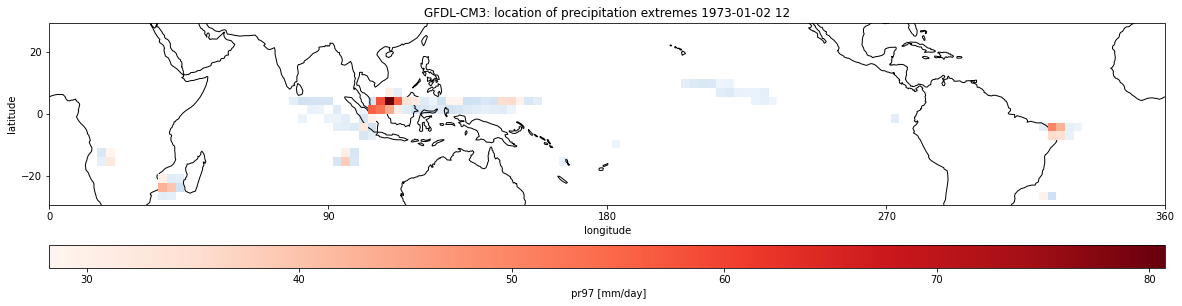

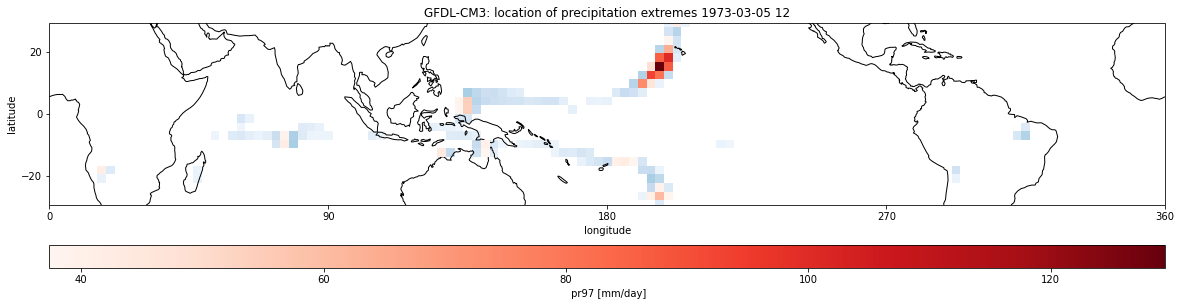

In [52]:
fig= plt.figure(figsize=(20,7.5))

lat = precip.lat
lon = precip.lon
lonm,latm = np.meshgrid(lon,lat)

rome_prctile = np.percentile(rome[rome_option],99)
x2= np.argwhere(rome[rome_option].data>=rome_prctile)

for x in x2[0:5]:
    fig= plt.figure(figsize=(20,7.5))
    ax = fig.add_subplot(projection=ccrs.PlateCarree(central_longitude=180))

    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())

    pr_day = precip.isel(time=x[0])
    extreme_percentileDay = pr_percentiles[percentile_option].isel(time=x[0]).data

    ax.pcolormesh(lonm,latm, pr_day.where(pr_day>conv_threshold),transform=ccrs.PlateCarree(),zorder=0, cmap='Blues', vmin=15, vmax=80)
    pcm= ax.pcolormesh(lonm,latm, pr_day.where(pr_day>extreme_percentileDay),transform=ccrs.PlateCarree(), cmap='Reds')

    ax.set_title(model + ': location of precipitation extremes ' + str(pr_day.coords['time'].values)[:13] )
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude')

    ax.set_yticks([-20, 0, 20])
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])

    plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = ' pr97 [mm/day]')


In [15]:
from matplotlib import pyplot as plt, animation
from IPython.display import HTML, display

# animate live in jupyter cell
# HTML(ani.to_jshtml())

# display saved mp4 in jupyter notebook with:
# display(HTML("<video controls><source src='/Users/cbla0002/Documents/data/cmip5/animations/GFDL-CM3_location_high_pr_percentile_historical.mp4' type='video/mp4'></video>"))

# save mp4 using ffmpeg
# folder = home + '/Documents/data/cmip5/animations'
# fileName = model + '_location_high_pr_percentile_' + experiment + '.mp4'
# path = folder + '/' + fileName
# ani.save(path)

In [16]:
fig= plt.figure(figsize=(20,7.5))

lat = precip.lat
lon = precip.lon
lonm,latm = np.meshgrid(lon,lat)

rome_prctile = np.percentile(rome[rome_option],99)
x2= np.argwhere(rome[rome_option].data>=rome_prctile)

def animate(frame):    
    ax = fig.add_subplot(projection=ccrs.PlateCarree(central_longitude=180))

    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())

    pr_day = precip.isel(time=x2[frame][0])
    extreme_percentileDay = pr_percentiles[percentile_option].isel(time=x2[frame][0]).data

    pcm= ax.pcolormesh(lonm,latm, pr_day.where(pr_day>conv_threshold),transform=ccrs.PlateCarree(),zorder=0, cmap='Blues', vmin=15, vmax=80)
    ax.pcolormesh(lonm,latm, pr_day.where(pr_day>extreme_percentileDay),transform=ccrs.PlateCarree(), cmap='Reds')

    ax.set_title(model + ': location of precipitation extremes')
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude')

    ax.set_yticks([-20, 0, 20])
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])

    plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = ' pr97 [mm/day]')
    plt.close()


ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=10,       # Could also be iterable or list
    interval=500     # ms between frames
)

<Figure size 1440x540 with 0 Axes>

In [17]:
HTML(ani.to_jshtml())

In [19]:
folder = home + '/Documents/data/cmip5/' + model
fileName = model + '_numberIndex_' + experiment + '.nc'
path = folder + '/' + fileName
numberIndex = xr.open_dataset(path)
numberIndex

<xarray.Dataset>
Dimensions:   (time: 10950)
Coordinates:
  * time      (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Data variables:
    o_number  (time) float64 ...
    areaf     (time) float64 ...

In [20]:
numberIndex_options = [
    'o_number',
    # 'areaf'
    ]
numberIndex_option = numberIndex_options[0]

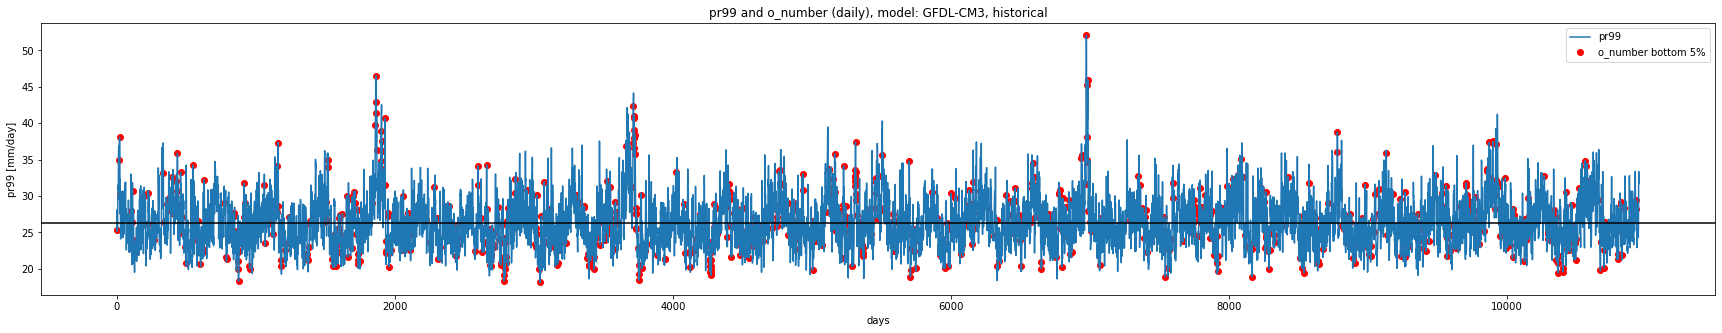

In [52]:
f, ax = plt.subplots(figsize = (30,5))

y = pr_percentiles[percentile_option].data
x= np.arange(0,len(y),1)
numberIndex_prctile = np.percentile(numberIndex[numberIndex_option],5)
x2= np.argwhere(numberIndex[numberIndex_option].data<=numberIndex_prctile)

ax.plot(x,y, label=percentile_option)
ax.scatter(x2,y[x2],label='o_number bottom 5%', color='r')
ax.axhline(y=np.mean(y), color='k')
ax.set_title(percentile_option + ' and ' + numberIndex_option + ' (daily), model: ' + model + ', ' + experiment)
ax.set_xlabel('days')
ax.set_ylabel(percentile_option + ' [mm/day]')
ax.legend()